In [2]:
#Moeeza Javed- 22101369 
#Aslı Gökçen Beşe- 


# Importing the libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import seaborn as sns

   
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


In [3]:
pip install --upgrade numpy scikit-learn threadpoolctl



  Using cached numpy-2.2.0-cp311-cp311-win_amd64.whl (12.9 MB)


In [4]:
path = r"C:\Users\DELL\OneDrive\data.csv"
my_data = pd.read_csv(path)
my_data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


<Axes: >

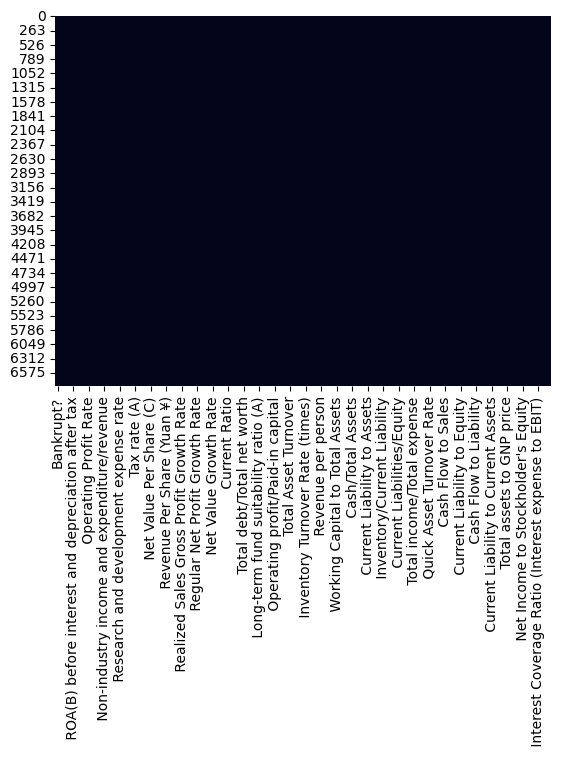

In [5]:
sns.heatmap(my_data.isnull(), cbar=False)

In [8]:
X= my_data.copy()

# Drop the target feature
X.drop(['Bankrupt?'],axis=1,inplace=True)

group = X.copy()

# copy the df
df_group=group.copy()


# set a scaler
scaler_group = StandardScaler()
# train the scaler
scaler_group.fit(group)
# scale the data
scaled_data = scaler_group.transform(group)


In [9]:
scaled_data

array([[-2.21790935, -2.04579778, -2.400361  , ..., -0.09897786,
         0.        , -0.62206729],
       [-0.67382819, -0.31106786, -0.59844969, ...,  0.3645587 ,
         0.        , -0.53557337],
       [-1.30367191, -0.90841978, -1.3199096 , ..., -0.125015  ,
         0.        , -0.62195984],
       ...,
       [-0.53484482, -0.37919423, -0.53499599, ..., -0.01510132,
         0.        ,  1.0012064 ],
       [ 0.01787518,  0.01959426,  0.00740279, ..., -0.00427044,
         0.        , -0.07136384],
       [-0.19983866,  0.17495561, -0.06561243, ..., -0.01445435,
         0.        ,  3.72572884]])

In [11]:
#creating a metrics dataframe that stores metrics for each model type
metrics_df = pd.DataFrame({
    "Metric": ["True Positives", "True Negatives", "False Positives", "False Negatives",
               "Total Misclassified", "Total Correct", "Total Predictions", "Hit Rate", "Profit"]
})

In [12]:
#checking multi-colinearity, 
correlation_matrix = X.corr()

# Display correlation matrix
print(correlation_matrix)



                                                     ROA(C) before interest and depreciation before interest  \
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
 Realized Sales Gross Margin                                                                 0.332755          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575   

In [13]:
#PCA to remove high-colinearity because some values are close to 1

# Build the clustering model

# Define the PCA number that gives the cutoff explanation

# Define parameters and dataframe
sacled_data2 = scaled_data.copy()

num_pca = 12

# Create PCA 
def PCA_short(scaled_data2):
    # copy the df
    df_group=scaled_data2.copy()


    # build the PCA model
    pca_group = PCA(n_components = num_pca)
    # train the model using my data
    pca_group.fit(scaled_data2)
    # applied the model to my dataset
    x_pca_group = pca_group.transform(scaled_data2)
    
    return x_pca_group

scaled_pca_data = PCA_short(scaled_data)

In [14]:
scaled_pca_data 
print(type(scaled_pca_data))


<class 'numpy.ndarray'>


In [15]:
# Create clusters
num_cluster = 4

def kcentroid(scaled_pca_data):
        # build the clustering model using the number of clusters
        kmeans_df = KMeans(n_clusters = num_cluster)
        # train the model
        kmeans_df.fit(scaled_pca_data)

        # define centroids
        centroids_df=kmeans_df.cluster_centers_
        # define labels
        labels_df=kmeans_df.labels_

        # put them in a df
        clusters_df=pd.DataFrame(labels_df)
        # name them
        clusters_df["cluster"]=clusters_df
        # assign id numbers
        clusters_df=clusters_df.assign(rec_id=np.arange(len(clusters_df))).reset_index(drop=True)

        return clusters_df

cl1 = kcentroid(scaled_pca_data)


In [16]:
cl1

,0,cluster,rec_id
0,3,3,0
1,2,2,1
2,3,3,2
3,3,3,3
4,2,2,4
...,...,...,...
6814,2,2,6814
6815,2,2,6815
6816,2,2,6816
6817,2,2,6817


In [17]:
# Create a new DataFrame with the cluster labels from the clustering result
df_clusters = cl1[['cluster']]  # Extract cluster column from the result of kmeans

df2 = group.assign(rec_id=np.arange(len(group))).reset_index(drop=True)
cl2 = cl1.drop([0], axis=1)
cl3 = df2.merge(cl2, on="rec_id", how="inner", validate="1:1")
cl3.drop(['rec_id'], axis=1, inplace=True)
cl3_cl = pd.get_dummies(cl3['cluster'], prefix='cluster')
cl4 = pd.concat([cl3, cl3_cl], axis=1)


In [18]:
#Splitting the data into training and testing sets 
# Select the target feature
target = my_data['Bankrupt?']

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    cl4, 
    target, 
    test_size=0.30,
    random_state=101
)

In [19]:
#2nd step: Modeling
#1- Logistic Model

# define the model type
model_type = 'logit'

# define the model
logistic_model = LogisticRegression(max_iter=1000)


cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")

## 2.b. Train the model using the training dataset 
# train the model
logistic_model.fit(X_train, y_train)

## 2.c. Testing the model using the test dataset 
# make predictions 
logistic_model_pred = logistic_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, logistic_model_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, logistic_model_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, logistic_model_pred))


Cross-validation accuracy scores: [0.96125654 0.96439791 0.96335079 0.96226415 0.96436059]
Accuracy: 0.9618768328445748

Confusion Matrix:
[[1968   12]
 [  66    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.96      0.95      2046



In [20]:
log_conf_data_model = pd.DataFrame(confusion_matrix(y_test, logistic_model_pred))

# Extract values from confusion matrix
log_true_negatives = log_conf_data_model.iloc[0, 0]
log_false_positives = log_conf_data_model.iloc[0, 1]  
log_false_negatives = log_conf_data_model.iloc[1, 0]  
log_true_positives = log_conf_data_model.iloc[1, 1]   

# Calculate total wrong predictions
log_pred_model_mis = log_false_positives + log_false_negatives

# Calculate total correct predictions 
log_pred_model_hits = log_true_positives + log_true_negatives

log_pred_model_total = log_pred_model_hits + log_pred_model_mis
log_hit_rate = log_pred_model_hits /log_pred_model_total

# Calculate the profit
log_pred_model_profit = (log_true_positives *10 + log_true_negatives * 30) - (log_false_positives *10 + log_false_negatives * 50)

#Putting metrics calculated into the earlier dataframe
metrics_df["Logistic Regression"] = [
    log_true_positives, log_true_negatives, log_false_positives, log_false_negatives,
    log_pred_model_mis, log_pred_model_hits, log_pred_model_total, log_pred_model_total, log_pred_model_profit
]
metrics_df

,Metric,Logistic Regression
0,True Positives,0
1,True Negatives,1968
2,False Positives,12
3,False Negatives,66
4,Total Misclassified,78
5,Total Correct,1968
6,Total Predictions,2046
7,Hit Rate,2046
8,Profit,55620


In [21]:
## 2.a. Build the model by calling it from the library
# # 2.a.iii. SVM
# define the model type
model_type = 'svm'

# define the model
svm_model = SVC(class_weight='balanced')


cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")


## 2.b. Train the model using the training dataset 
# train the model
svm_model.fit(X_train, y_train)

## 2.c. Testing the model using the test dataset 
# make predictions 
svm_model_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_model_pred)
print(f"Accuracy: {accuracy}")

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_model_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, svm_model_pred))



Cross-validation accuracy scores: [0.7434555  0.71099476 0.69424084 0.721174   0.72851153]
Accuracy: 0.7121212121212122

Confusion Matrix:
[[1425  555]
 [  34   32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1980
           1       0.05      0.48      0.10        66

    accuracy                           0.71      2046
   macro avg       0.52      0.60      0.46      2046
weighted avg       0.95      0.71      0.81      2046



In [22]:
svm_conf_data_model = pd.DataFrame(confusion_matrix(y_test, svm_model_pred))

# Extract values from confusion matrix
svm_true_negatives = svm_conf_data_model.iloc[0, 0]  
svm_false_positives = svm_conf_data_model.iloc[0, 1]  
svm_false_negatives = svm_conf_data_model.iloc[1, 0]  
svm_true_positives = svm_conf_data_model.iloc[1, 1]   

# Calculate total wrong predictions
svm_pred_model_mis = svm_false_positives + svm_false_negatives

# Calculate total correct predictions 
svm_pred_model_hits = svm_true_positives + svm_true_negatives


svm_pred_model_total = svm_pred_model_hits + svm_pred_model_mis
svm_hit_rate = svm_pred_model_hits /svm_pred_model_total

# Calculate the profit
svm_pred_model_profit = (svm_true_positives *10 + svm_true_negatives *30) - (svm_false_positives * 10+ svm_false_negatives*50) 

#Putting metrics calculated into the earlier dataframe
metrics_df["SVM"] = [
     svm_true_positives, svm_true_negatives, svm_false_positives, svm_false_negatives,
    svm_pred_model_mis, svm_pred_model_hits, svm_pred_model_total, svm_pred_model_total, svm_pred_model_profit
]

metrics_df

,Metric,Logistic Regression,SVM
0,True Positives,0,32
1,True Negatives,1968,1425
2,False Positives,12,555
3,False Negatives,66,34
4,Total Misclassified,78,589
5,Total Correct,1968,1457
6,Total Predictions,2046,2046
7,Hit Rate,2046,2046
8,Profit,55620,35820


In [23]:
## 2.a. Build the model by calling it from the library
# # 2.a.iv. Random forrest model, we use randomforrestclassifier, which is used for classification, for use in binary data models


# define the model type
model_type = 'rf'

# define the model
rand_model = RandomForestClassifier()

cv_scores = cross_val_score(rand_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")


## 2.b. Train the model using the training dataset 
# train the model
rand_model.fit(X_train, y_train)

## 2.c. Testing the model using the test dataset 
# make predictions 
random_forrest_model_pred = rand_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, random_forrest_model_pred)
print(f"Accuracy: {accuracy}")

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, random_forrest_model_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, random_forrest_model_pred))


Cross-validation accuracy scores: [0.96753927 0.97382199 0.97277487 0.96855346 0.96855346]
Accuracy: 0.9716520039100685

Confusion Matrix:
[[1977    3]
 [  55   11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1980
           1       0.79      0.17      0.28        66

    accuracy                           0.97      2046
   macro avg       0.88      0.58      0.63      2046
weighted avg       0.97      0.97      0.96      2046



In [24]:

rand_conf_data_model = pd.DataFrame(confusion_matrix(y_test, random_forrest_model_pred))

# Extract values from confusion matrix
rand_true_negatives = rand_conf_data_model.iloc[0, 0]  
rand_false_positives = rand_conf_data_model.iloc[0, 1]  
rand_false_negatives = rand_conf_data_model.iloc[1, 0]  
rand_true_positives = rand_conf_data_model.iloc[1, 1]   

# Calculate total wrong predictions 
rand_pred_model_mis = rand_false_positives + rand_false_negatives

# Calculate total correct predictions 
rand_pred_model_hits = rand_true_positives + rand_true_negatives


rand_pred_model_total = rand_pred_model_hits + rand_pred_model_mis
rand_hit_rate = rand_pred_model_hits /rand_pred_model_total

# Calculate the profit
rand_pred_model_profit =( rand_true_positives *10 + rand_true_negatives * 30 ) - (rand_false_positives* 10 + rand_false_negatives * 50)

#Putting metrics calculated into the earlier dataframe
metrics_df["Random Forrest"] = [
     rand_true_positives, rand_true_negatives, rand_false_positives, rand_false_negatives,
    rand_pred_model_mis, rand_pred_model_hits, rand_pred_model_total, rand_pred_model_total, rand_pred_model_profit
]

metrics_df

,Metric,Logistic Regression,SVM,Random Forrest
0,True Positives,0,32,11
1,True Negatives,1968,1425,1977
2,False Positives,12,555,3
3,False Negatives,66,34,55
4,Total Misclassified,78,589,58
5,Total Correct,1968,1457,1988
6,Total Predictions,2046,2046,2046
7,Hit Rate,2046,2046,2046
8,Profit,55620,35820,56640


In [25]:
# B.3.iv. Neural Networks

# Define the model type
model_type = 'nn'

nn_model = Sequential()
nn_model.add(Dense(62, activation='relu'))
nn_model.add(Dense(units=62, activation='relu'))
#using si gmoid function to use nn model for binary classification
nn_model.add(Dense(units=1, activation = 'sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy')
nn_model.fit(X_train, y_train, batch_size=10, epochs=20)
nn_model_pred = nn_model.predict(X_test)


Epoch 1/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 57947380.0000
Epoch 2/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9465440.0000
Epoch 3/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9430088.0000
Epoch 4/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4055905.5000
Epoch 5/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - loss: 4355019.5000
Epoch 6/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 3587504.5000
Epoch 7/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 3432135.5000
Epoch 8/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 2630959.0000
Epoch 9/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 2366669.2500
Epoch 10/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 1833440.0000
Epoch 11/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 1625400.5000
Epoch 12/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1306074.8750
Epoch 13/20
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 1019435.4375
Epoch 14/20
478/478 ━━━━━━━━━━

In [26]:


# Convert continuous predictions to binary class labels
nn_model_pred_binary = (nn_model_pred > 0.5).astype(int) 


# Evaluate the model
accuracy = accuracy_score(y_test, nn_model_pred_binary)
print(f"Accuracy: {accuracy}")

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_model_pred_binary))


# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, nn_model_pred_binary))


Accuracy: 0.9589442815249267

Confusion Matrix:
[[1961   19]
 [  65    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1980
           1       0.05      0.02      0.02        66

    accuracy                           0.96      2046
   macro avg       0.51      0.50      0.50      2046
weighted avg       0.94      0.96      0.95      2046



In [27]:
nn_conf_data_model = pd.DataFrame(confusion_matrix(y_test, nn_model_pred_binary))

# Extract values from confusion matrix
nn_true_negatives = nn_conf_data_model.iloc[0, 0] 
nn_false_positives = nn_conf_data_model.iloc[0, 1] 
nn_false_negatives = nn_conf_data_model.iloc[1, 0]  
nn_true_positives = nn_conf_data_model.iloc[1, 1]  

# Calculate total misclassified predictions 
nn_pred_model_mis = nn_false_positives + nn_false_negatives

# Calculate total correct predictions 
nn_pred_model_hits = nn_true_positives + nn_true_negatives


nn_pred_model_total = nn_pred_model_hits + nn_pred_model_mis
nn_hit_rate = nn_pred_model_hits /nn_pred_model_total

# Calculate the profit
nn_pred_model_profit = (nn_true_positives * 10 + nn_true_negatives* 30) - (nn_false_positives *10 + nn_false_negatives *50)

#Putting metrics calculated into the earlier dataframe
metrics_df["Neural Networks"] = [
     nn_true_positives, nn_true_negatives, nn_false_positives, nn_false_negatives,
    nn_pred_model_mis, nn_pred_model_hits, nn_pred_model_total, nn_pred_model_total, nn_pred_model_profit
]

metrics_df

,Metric,Logistic Regression,SVM,Random Forrest,Neural Networks
0,True Positives,0,32,11,1
1,True Negatives,1968,1425,1977,1961
2,False Positives,12,555,3,19
3,False Negatives,66,34,55,65
4,Total Misclassified,78,589,58,84
5,Total Correct,1968,1457,1988,1962
6,Total Predictions,2046,2046,2046,2046
7,Hit Rate,2046,2046,2046,2046
8,Profit,55620,35820,56640,55400


<Axes: xlabel='Model Type', ylabel='Profit'>

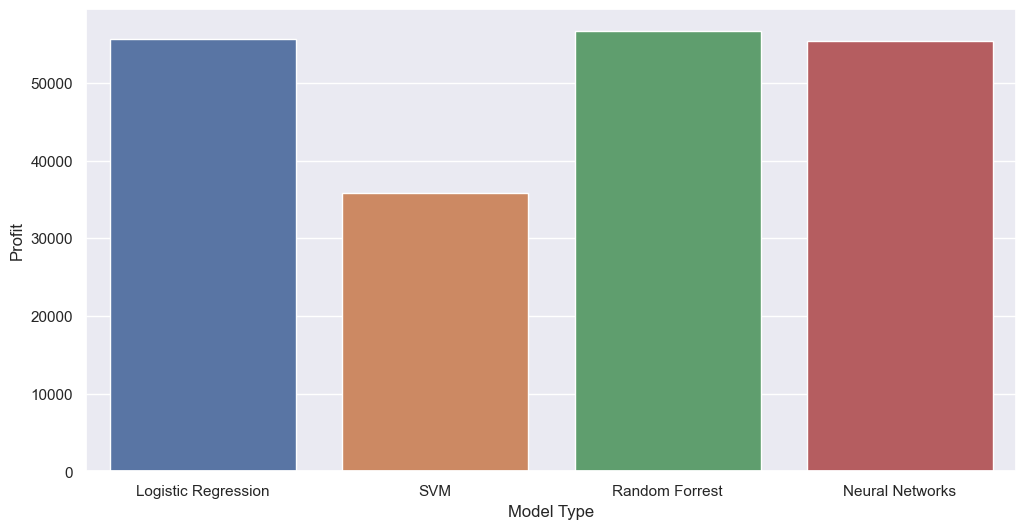

In [28]:
profit_row = metrics_df[metrics_df["Metric"] == "Profit"]

# Melt the dataframe to have the model types and Custom Score in a long format
profit_df = profit_row.drop("Metric", axis=1).melt(var_name="Model Type", value_name="Profit")

# Plotting
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12,6)})

sns.barplot(x="Model Type", y="Profit", data=profit_df, estimator=np.mean)
